<a href="https://colab.research.google.com/github/Prasunsk/ML_Assignments_Lectures/blob/master/Assignment_Clustering_Prasun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()

Saving assignment_shala_clustering.csv to assignment_shala_clustering.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['assignment_shala_clustering.csv']))
# Dataset is now stored in a Pandas Dataframe

In [0]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [0]:
print(df.isna().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [0]:
df=df.drop(['CustomerID'],axis=1)

In [0]:
#Label encoding gender column
from sklearn.preprocessing import LabelEncoder
lec=LabelEncoder()
df['Gender_norm'] = lec.fit_transform(df['Gender'])

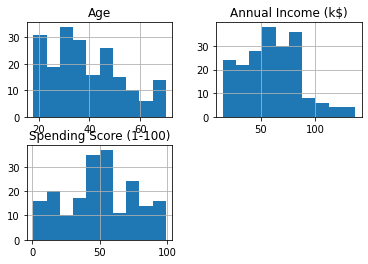

In [0]:
hist=df[['Age','Annual Income (k$)','Spending Score (1-100)']].hist()
plt.show()

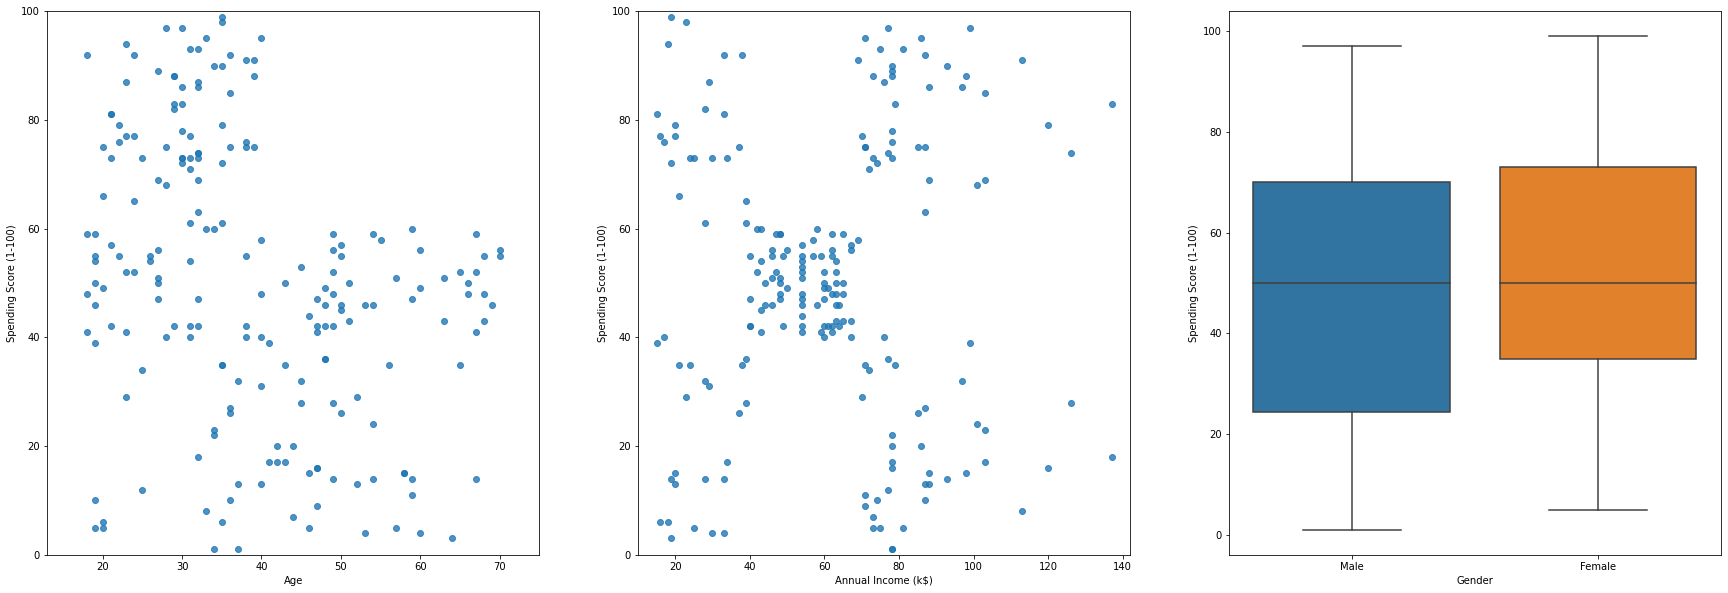

In [0]:
import seaborn as sns
# Scatter plot to fit the regression line 
plt.figure(figsize=[30,10])
plt.subplot(131)
sns.regplot(x = df["Age"],y = df.iloc[:,3],fit_reg=False)
plt.xlim(df['Age'].min()-5,df['Age'].max()+5)
plt.ylim(0,100)
plt.subplot(132)
sns.regplot(x = df.iloc[:,2],y = df.iloc[:,3],fit_reg=False)
plt.xlim(df.iloc[:,2].min()-5,df.iloc[:,2].max()+5)
plt.ylim(0,100)
plt.subplot(133)
sns.boxplot('Gender','Spending Score (1-100)',data=df)
# plt.xlim(df['Age'].min()-5,df['Age'].max()+5)
# plt.ylim(0,100)

In [0]:
#NORMALIZE THE VECTORS
from sklearn.preprocessing import normalize
from sklearn.preprocessing import PowerTransformer
norm_df = pd.DataFrame(index=np.arange(0,200),columns=['Salary_norm','Age_norm','Spending_norm'])
norm_df[['Age_norm','Salary_norm','Spending_norm']] = normalize(df[['Age','Annual Income (k$)','Spending Score (1-100)']])

In [0]:
norm_df.describe()

,Salary_norm,Age_norm,Spending_norm
count,200.000000,200.000000,200.000000
mean,0.631173,0.438273,0.531262
std,0.187690,0.188255,0.239311
min,0.176446,0.181117,0.011583
25%,0.522197,0.273069,0.417641
50%,0.644163,0.396582,0.562716
75%,0.765529,0.582146,0.679919
max,0.971821,0.957680,0.954967


After obsevations from k-means clustering , the gender column was removed from calculations ,cause that wasn't providing significant information, thus the new dataframe contains only 3 columns

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
inertia = []
score=[]
K1 = range(1,10)
for k in K1:
    kmean = KMeans(n_clusters=k)
    kmean.fit(norm_df)
    inertia.append(kmean.inertia_)
K2 = range(2,10)
for k in K2:
    kmean = KMeans(n_clusters=k)
    kmean.fit(norm_df)
    preds = kmean.predict(norm_df)
    x=silhouette_score(norm_df, kmean.labels_)
    score.append(x)


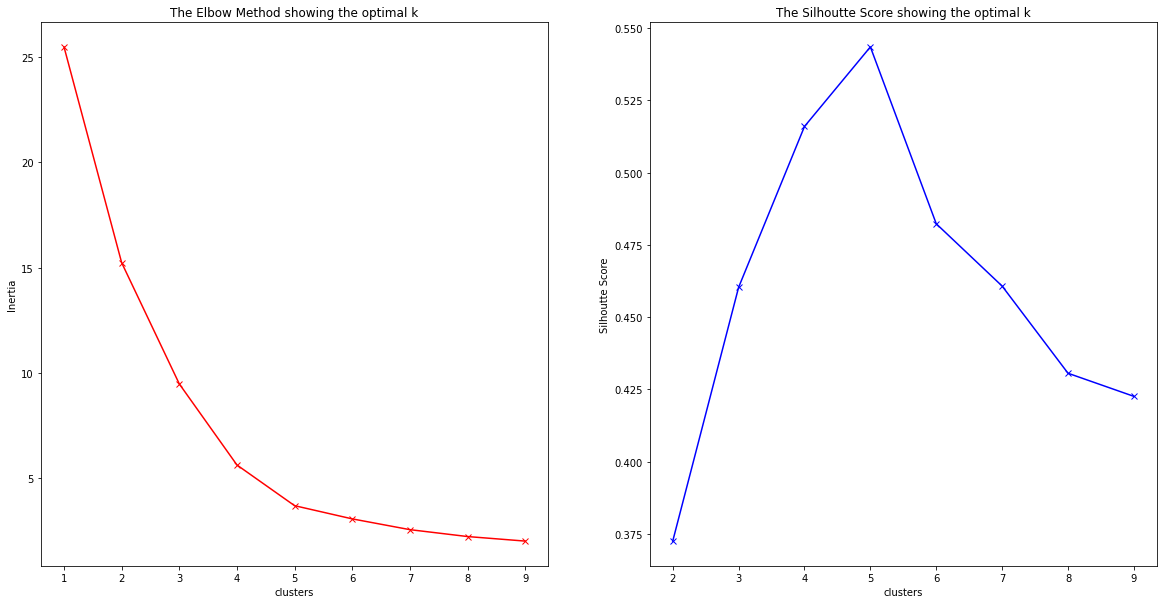

In [0]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(K1, inertia,'bx-',c='red')
plt.xlabel('clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.subplot(122)
plt.plot(K2, score,'bx-', c='blue')
plt.xlabel('clusters')
plt.ylabel('Silhoutte Score')
plt.title('The Silhoutte Score showing the optimal k')
plt.show()

So optimal number of clusters is 5

In [0]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(norm_df.iloc[:,1:])
df["k_label"] = clusters

In [0]:
df['k_label'].value_counts()

1    70
0    61
2    32
4    24
3    13
Name: k_label, dtype: int64

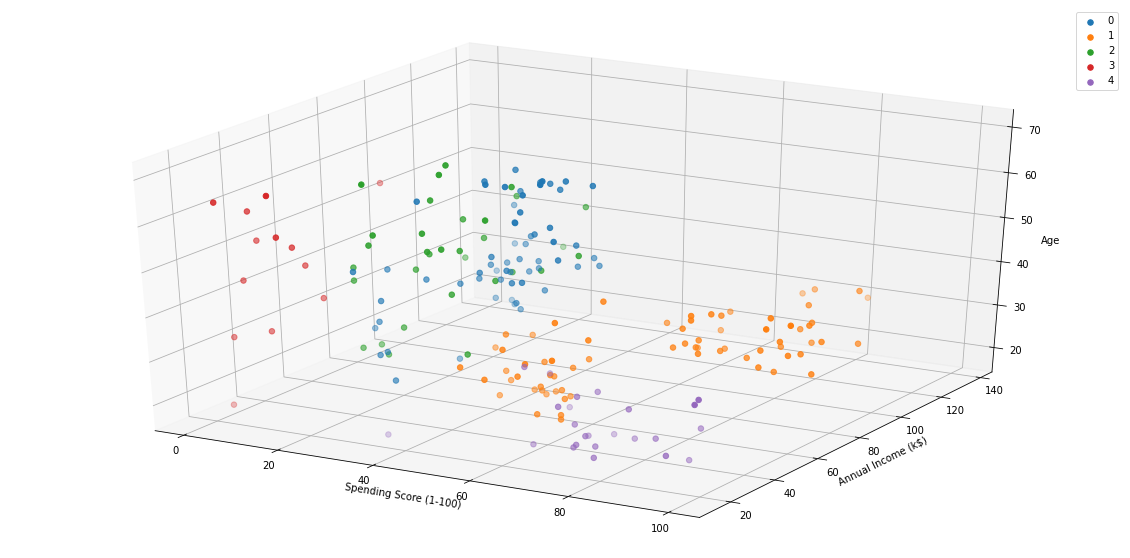

In [0]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(5): 
  ax.scatter( df["Spending Score (1-100)"][df.k_label == i],df["Annual Income (k$)"][df.k_label == i],df.Age[df.k_label == i], s=30)
# ax.view_init(30, 185)
plt.ylabel("Annual Income (k$)")
plt.xlabel("Spending Score (1-100)")
ax.set_zlabel('Age')
plt.legend(np.unique(df.k_label))
plt.show()

In [0]:
cluster = []
cluster.append(None)
group = df.groupby('k_label')
for n,g in group:
    cluster.append(g)

In [0]:
print('Features of cluseter 1: \n {}'.format(cluster[1].describe()))
print('Features of cluseter 2: \n {}'.format(cluster[2].describe()))
print('Features of cluseter 3: \n {}'.format(cluster[3].describe()))
print('Features of cluseter 4: \n {}'.format(cluster[4].describe()))
print('Features of cluseter 5: \n {}'.format(cluster[5].describe()))


Features of cluseter 1: 
        CustomerID        Age  ...  Spending Score (1-100)  k_label
count   61.000000  61.000000  ...               61.000000     61.0
mean    77.803279  52.196721  ...               45.622951      0.0
std     32.859712  10.565383  ...                8.467908      0.0
min      5.000000  31.000000  ...               26.000000      0.0
25%     56.000000  47.000000  ...               41.000000      0.0
50%     77.000000  50.000000  ...               46.000000      0.0
75%    103.000000  60.000000  ...               52.000000      0.0
max    161.000000  70.000000  ...               60.000000      0.0

[8 rows x 5 columns]
Features of cluseter 2: 
        CustomerID        Age  ...  Spending Score (1-100)  k_label
count   70.000000  70.000000  ...               70.000000     70.0
mean   130.200000  29.428571  ...               68.114286      1.0
std     43.157145   6.116197  ...               17.871151      0.0
min     48.000000  18.000000  ...               34.0000

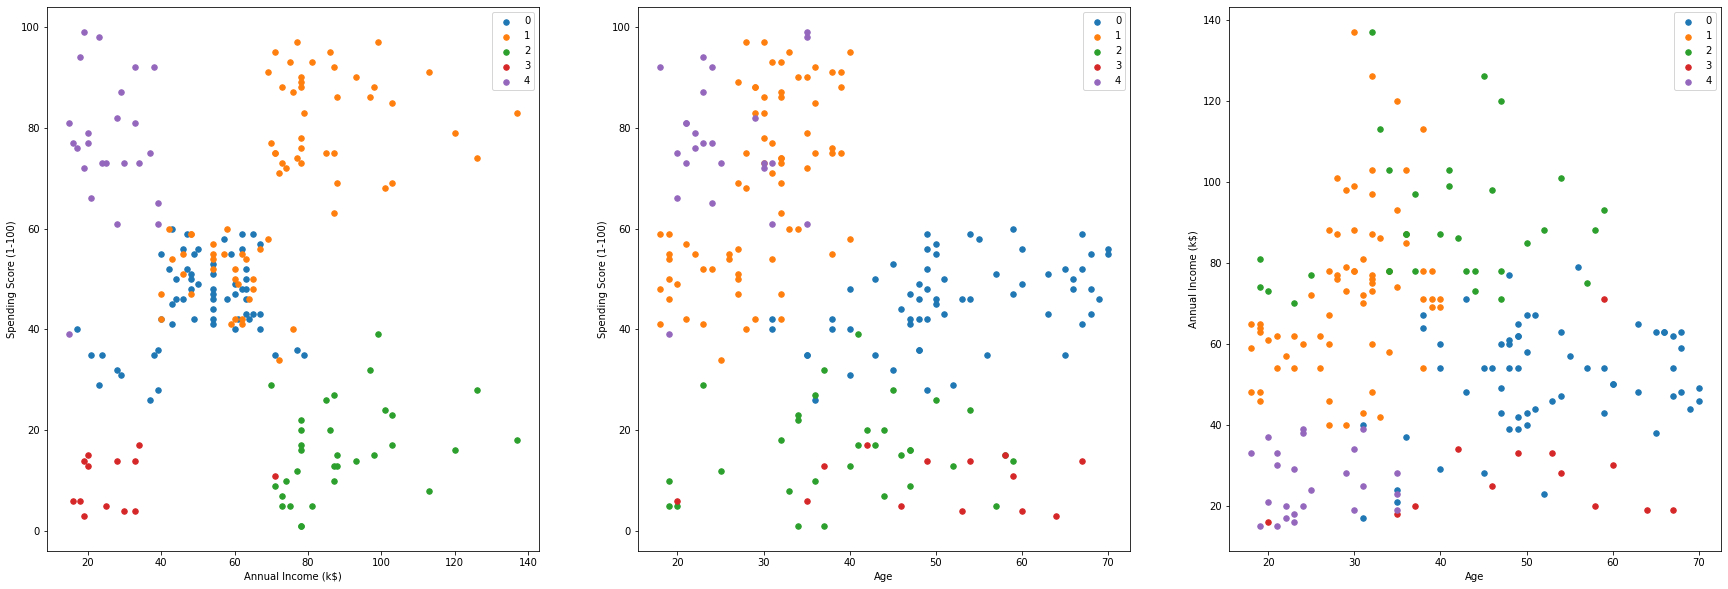

In [0]:
fig = plt.figure(figsize=(30,10))

ax1 = fig.add_subplot(131)
for i in range(5): 
  ax1.scatter( df["Annual Income (k$)"][df.k_label == i],df["Spending Score (1-100)"][df.k_label == i], s=30)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(np.unique(df.k_label))
ax2 = fig.add_subplot(132)
for i in range(5): 
  ax2.scatter( df["Age"][df.k_label == i],df["Spending Score (1-100)"][df.k_label == i], s=30)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)") 
plt.legend(np.unique(df.k_label)) 
ax3 = fig.add_subplot(133)
for i in range(5): 
  ax3.scatter( df["Age"][df.k_label == i],df["Annual Income (k$)"][df.k_label == i], s=30) 
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")  
plt.legend(np.unique(df.k_label))


The conclusions from k-means clustering 

**Cluster 1 :** Low to Medium Annual Income,with average spending scores aged 30 or above .

**Cluster 2 :** Moderate to high Annual Income , relatively young and have spending score .

**Cluster 3 :** High Annual income,but low spending score and spread across all ages.

**Cluster 4 :** Low Annual income ,low spending score spread across all ages.

**Cluster 5 :** Young , low income and high spending score. 

Algomerative Clustering :-

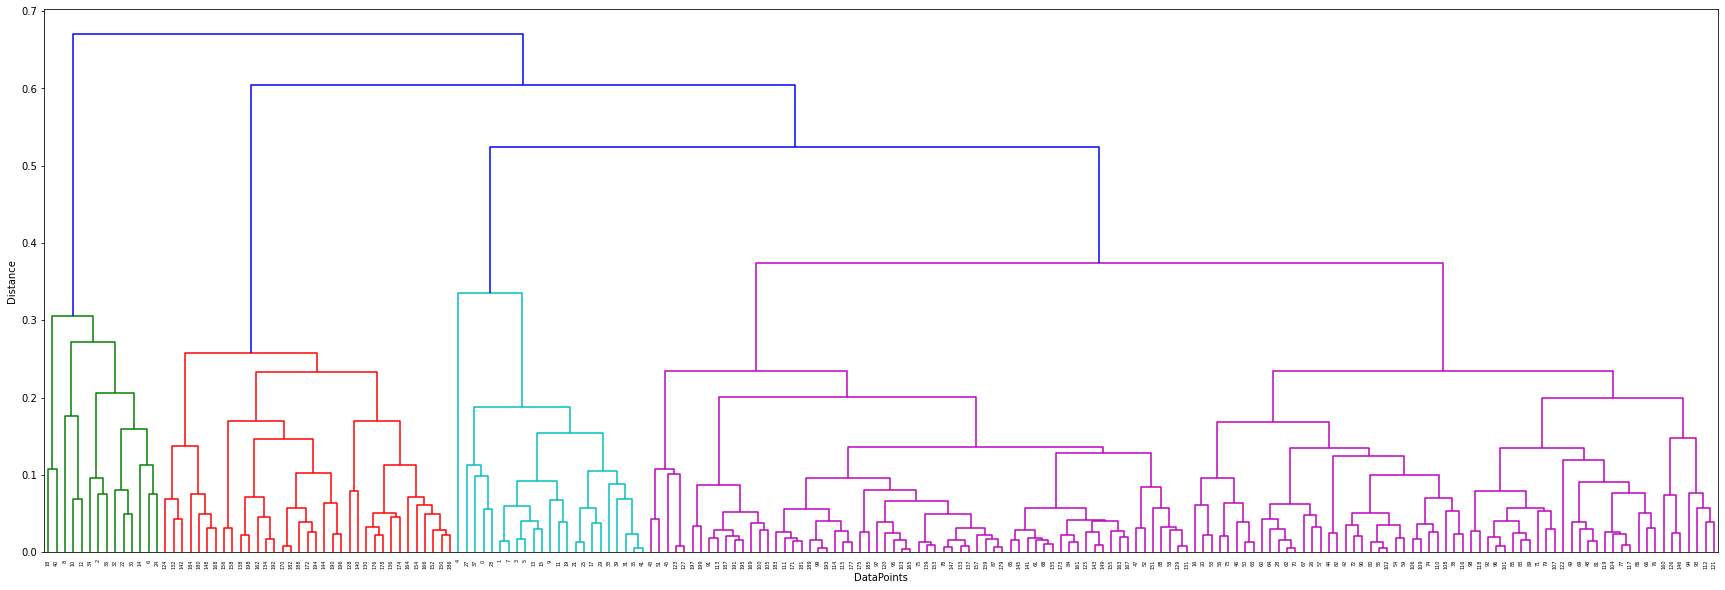

In [0]:
from scipy.cluster.hierarchy import dendrogram , linkage
plt.figure(figsize=[30,10])
dendrogram(linkage(norm_df,'average'))
plt.xlabel("DataPoints")
plt.ylabel('Distance')
plt.show()

Dendogram shows 4 cluster will be the best

In [0]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')  
df['ac_label']=ac.fit_predict(norm_df)

In [209]:
df['ac_label'].value_counts()

0    128
2     35
1     23
3     14
Name: ac_label, dtype: int64

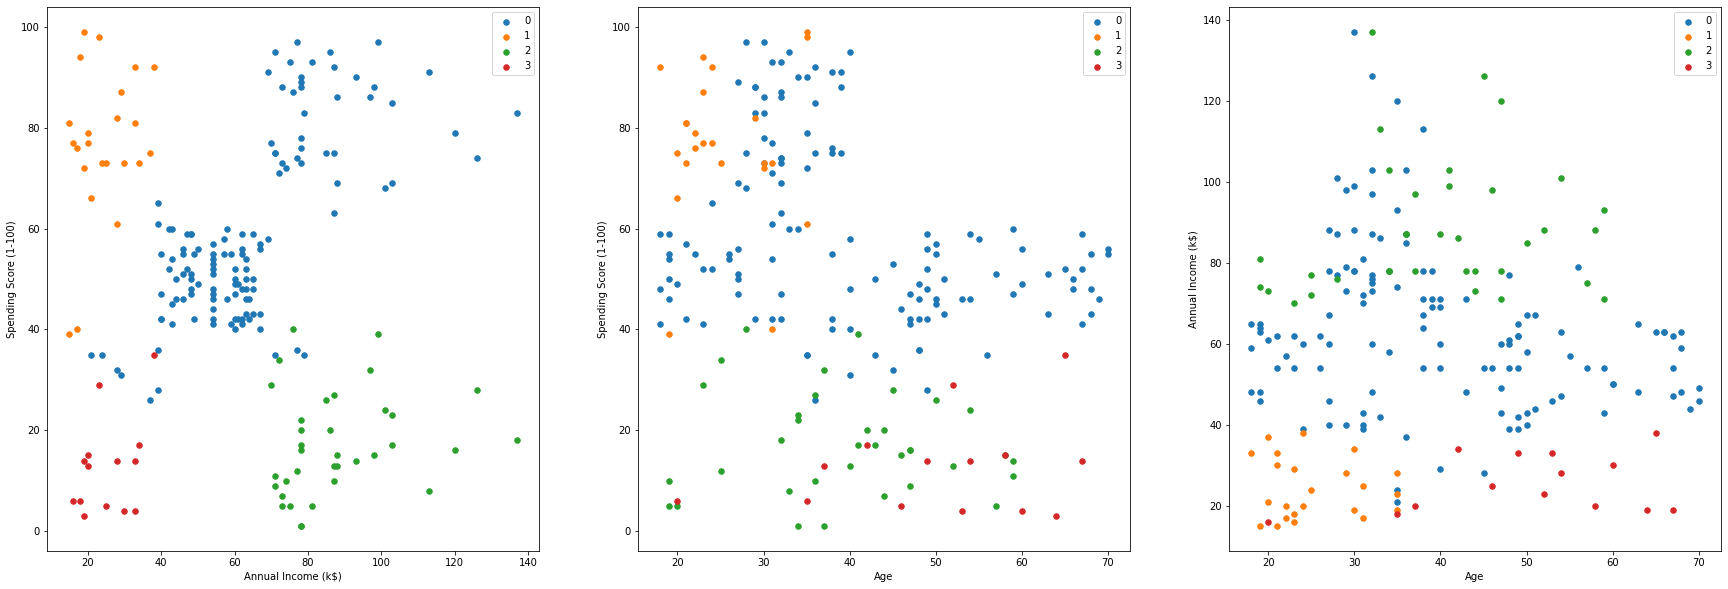

In [208]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(131)
for i in range(4): 
  ax1.scatter( df["Annual Income (k$)"][df.ac_label == i],df["Spending Score (1-100)"][df.ac_label == i],cmap='rainbow',s=30)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(np.unique(df.ac_label))
ax2 = fig.add_subplot(132)
for i in range(4): 
  ax2.scatter( df["Age"][df.ac_label == i],df["Spending Score (1-100)"][df.ac_label == i], s=30)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")  
plt.legend(np.unique(df.ac_label))
ax3 = fig.add_subplot(133)
for i in range(4): 
  ax3.scatter( df["Age"][df.ac_label == i],df["Annual Income (k$)"][df.ac_label == i], s=30) 
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")  
plt.legend(np.unique(df.ac_label))

The conclusions from Algomerative clustering 

**Cluster 1 :** Low to High Annual Income,with moderate to high spending scores spread across all ages .

**Cluster 2 :** Young , low income and high spending score, similar to cluster 5 of k-means .

**Cluster 3 :** High Annual income,but low spending score and spread across all ages, similar to cluster 3 of k-means

**Cluster 4 :** Low Annual income ,low spending score spread across all ages,similar to cluster 5 of k-means 


**DBSCAN**

In [0]:
from sklearn.cluster import DBSCAN

Silhoutte index or elbow metrics shouldnt be used for DBSCAN because there are a lot of dat points that will be classified as noise /outlier. These metrics will class them into one cluster ,thus they shouldnt be used. 

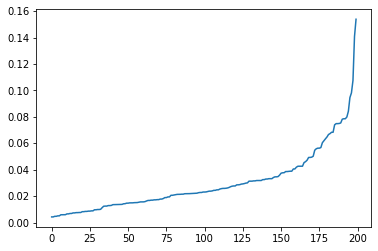

In [0]:
from sklearn.neighbors import NearestNeighbors
neibor= NearestNeighbors(n_neighbors=2)
nbrs= neibor.fit(norm_df)
distances,indices = nbrs.kneighbors(norm_df)

distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)

The optimum value of epsilon will be found at the point of maximum curvature.
So eps=0.08

Grid Search for more accurate hyper parameters

In [0]:
def  get_metrics ( eps ,  min_samples ,  dataset ):
    dbscan_model_  =  DBSCAN (  eps  =  eps ,  min_samples  =  min_samples ) 
    dbscan_model_ . fit ( dataset )
    # Mean Noise Point Distance metric ============================================ = 
    noise_indices  =  dbscan_model_ . labels_  ==  - 1    
    if  True  in  noise_indices : 
        neighboors  =  NearestNeighbors ( n_neighbors  =  6 ) . fit ( dataset ) 
        distances ,  indices  =  neighboors.kneighbors( dataset ) 
        noise_distances  =  distances [ noise_indices ,  1 :] 
        noise_mean_distance  =  round ( noise_distances.mean(),  3 ) 
    else :
        noise_mean_distance  =  0        
    # Number of found Clusters metric ============================================ ==   
    number_of_clusters  =  len ( set ( dbscan_model_ . labels_ [ dbscan_model_ . labels_  >=  0 ]))         
    return ( noise_mean_distance ,  number_of_clusters )

In [0]:
# Dataframe for the metric on the average distance of the noise points from the nearest K points 
results_noise= pd.DataFrame(data = np.zeros((20,6)), columns=np.arange(5,11), index = np.linspace(0.01, 0.20, num=20))
# Dataframe for the metric on the number of clusters 
results_clusters = pd.DataFrame(data = np.zeros((20,6)), columns=np.arange(5,11), index = np.linspace(0.01, 0.20, num=20))

In [0]:
epsilon= np.linspace(0.01, 0.20, num=20)

for  eps  in  epsilon: 
    for  n  in  range(5,11):       
        # Calculate 
        noise_metric ,  cluster_metric  =  get_metrics ( eps , n, norm_df )        
        # I insert the results in the related dataframe 
        results_noise.loc[ eps ,  n ]  =  (noise_metric - eps) 
        results_clusters.loc[ eps , n ]  =  cluster_metric

Mean Noise Points Distance gives the mean of all distances of all noise points from  the core/boundary point . I substacted it from the epsilon to give the amount of safe margin in each case . 

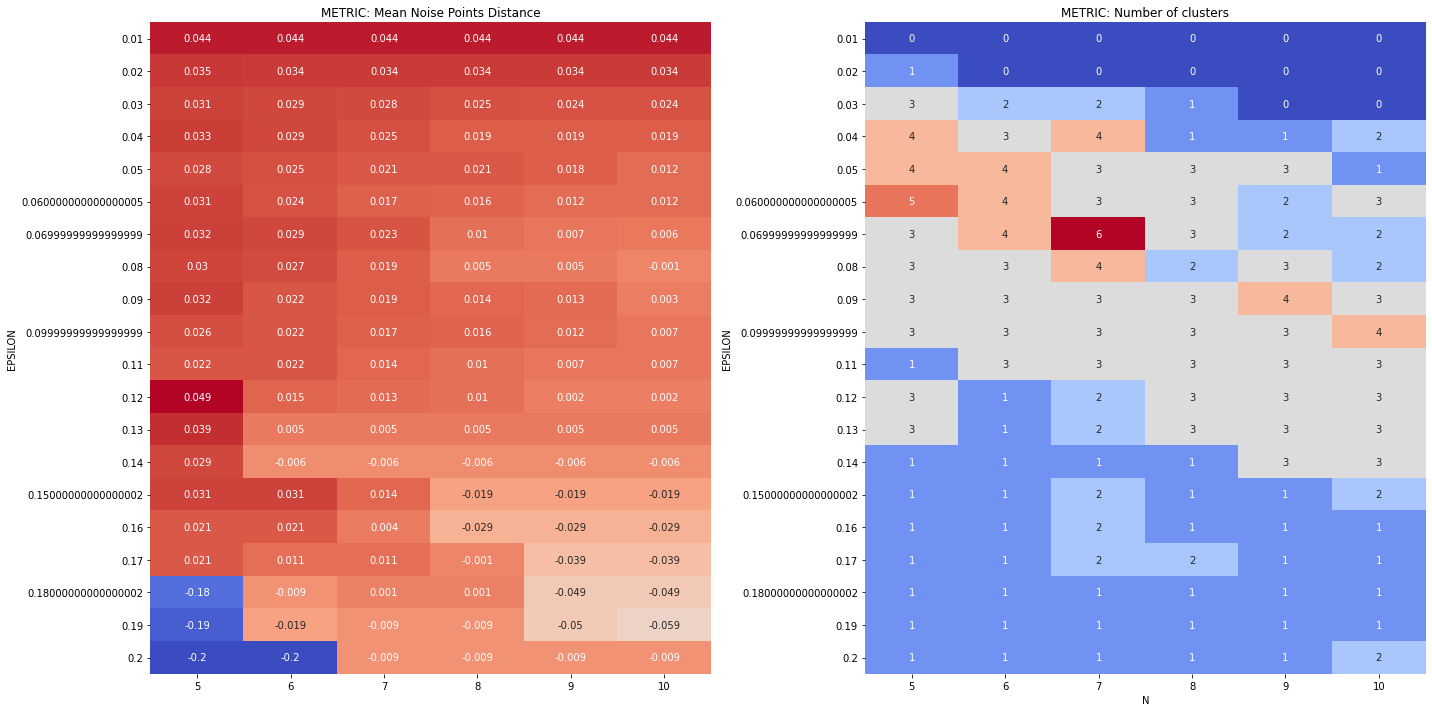

In [189]:
fig ,  (ax1,ax2 )  =  plt.subplots( 1 ,2 ,  figsize = ( 20 , 10 )  )

sns . heatmap ( results_noise ,  annot  =  True ,  ax  =  ax1 ,  cbar  =  False ,cmap='coolwarm' ) . set_title ( "METRIC: Mean Noise Points Distance - Epsilon" ) 
sns . heatmap ( results_clusters ,  annot  =  True ,  ax  =  ax2 ,  cbar  =  False ,cmap='coolwarm') . set_title ( "METRIC: Number of clusters" )
# sns . heatmap ( results_safe_df ,  annot  =  True ,  ax  =  ax2 ,  cbar  =  False ,cmap='coolwarm') . set_title ( "METRIC: Mean noise Point Distance - Epsilon" )
ax1.set_ylabel( "N" );  ax2.set_xlabel( "N" ) 
ax1.set_ylabel( "EPSILON" );  ax2.set_ylabel( "EPSILON" )
# ax1.set_ylabel(); ax3
plt . tight_layout();  
plt . show()

Analyzing the two heatmaps we immediately realize that for low values ​​of ε practically all points are identified as noise points (0 clusters). Conversely, for high values ​​of ε(i.e ε>0.14 ) we tend to have only one cluster.

The (mean_noise_points_distance-epsilon) should be high.
The unusual trend at n=5  for ε in 0.12 and 0.13 is explained by taking value_counts() of the labels and it showed 90% of data belonging to a single cluster.
The search is restricted to values 0.11 <ε < 0.14 and 7<n<10 .
 
*This method doesnt give the number of noise points in each setting ,which I will add later,cause i=of time limitations for this assignment*. 

We then choose n =5 and ε = 0.0605 which give us on average more distant noise points 

In [0]:
dbscan = DBSCAN(eps=0.0605, min_samples = 5)
df['db_label'] = dbscan.fit_predict(norm_df)

In [205]:
df['db_label'].value_counts()

-1    61
 2    58
 1    52
 0    13
 3    11
 4     5
Name: db_label, dtype: int64

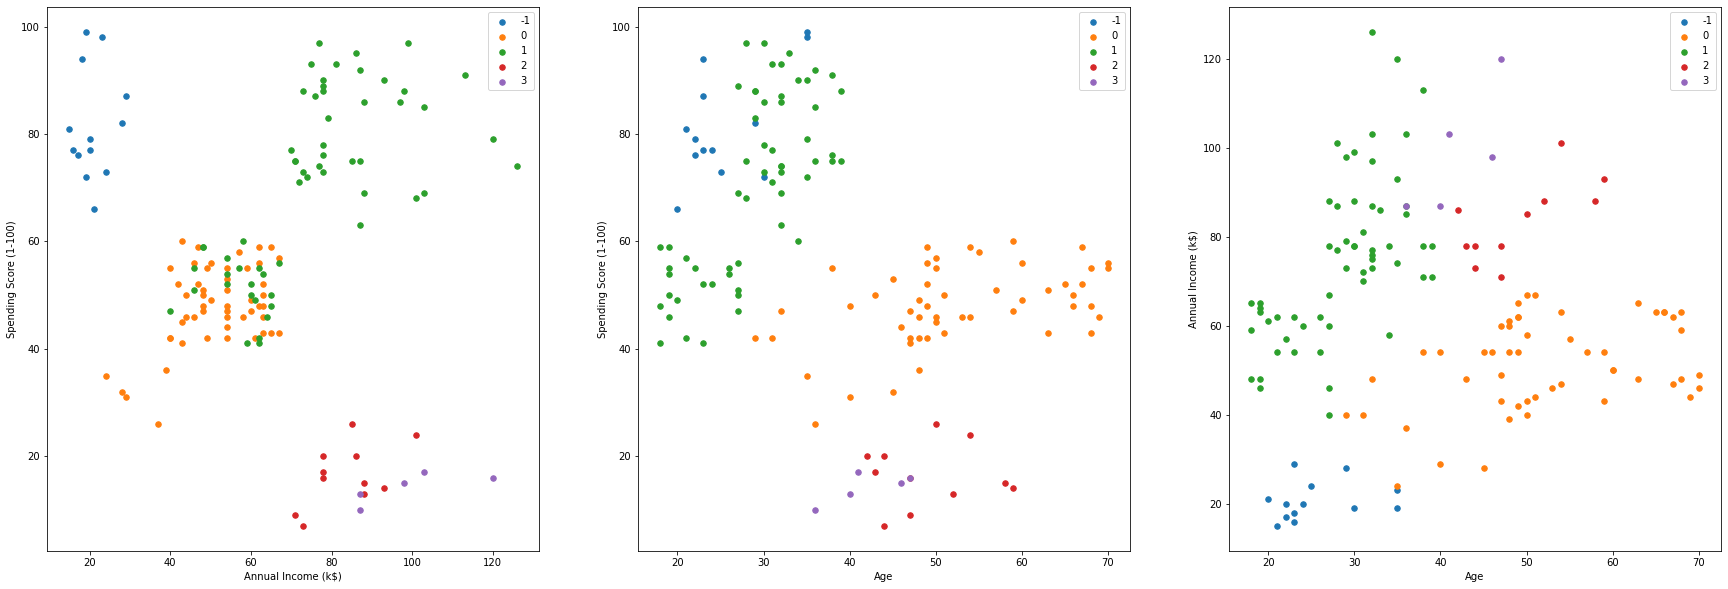

In [206]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(131)
for i in range(5): 
  ax1.scatter( df["Annual Income (k$)"][df.db_label == i],df["Spending Score (1-100)"][df.db_label == i],cmap='rainbow',s=30)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(np.unique(df.db_label))
ax2 = fig.add_subplot(132)
for i in range(5): 
  ax2.scatter( df["Age"][df.db_label == i],df["Spending Score (1-100)"][df.db_label == i], s=30)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")  
plt.legend(np.unique(df.db_label))
ax3 = fig.add_subplot(133)
for i in range(5): 
  ax3.scatter( df["Age"][df.db_label == i],df["Annual Income (k$)"][df.db_label == i], s=30) 
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")  
plt.legend(np.unique(df.db_label))

The conclusions from DBSCAN clustering

Cluster 1 : Low to Medium Annual Income,with average spending scores aged 30 or above ,similar to cluster 1 of k-means 

Cluster 2 : Moderate to high Annual Income , relatively young and have moderate to high spending score ,similar to cluster 2 of k-means

Cluster 3 : High Annual income,but low spending score and of people older than 40.

Cluster 4 : High Annual income ,low speending score in middle ages.

Cluster -1 (NOISE): Young , low income and high spending score, similar to cluster 5 of k-means

**Conclusion**

---



Although K-means and DBSCAN does a pretty similar job , but Algomerative Clustering summarises its better .
 So, here are the clusters and how to keep them more engaged or increase their spending score. 
 The conclusions from Algomerative clustering 


---


**Cluster 1 :** Low to High Annual Income,with moderate to high spending scores spread across all ages .

**Strategy** Appreciate their commitment to the mall by gifting them tags like 'Customer of the month' etc


---


**Cluster 2 :** Young , low income and high spending score.

**Strategy** Although their annual income is lower still they spend a lot , so to encourage them , send them small discount coupons of 5-15%


---


**Cluster 3 :** High Annual income,but low spending score and spread across all ages.

**Strategy** They needs to be motivated to come more.Maybe they have some other issues with the mall. So, apart from the discounts ,maybe their suggestions about the mall should be considered to improve their mall purcahses.


---


**Cluster 4 :** Low Annual income ,low spending score spread across all ages. 

**Strategy** Keeping in mind their low Annual Income they should be specialised high discounts to increase their mall purchases.
